# データハンドリング

## Str Handling

In [91]:
dic = {
    "CEO" : {"Aidemy" : "Ishikawa Akihiko", "Apple" : "Tim Cook", "Facebook" : "Mark Zuckerbarg" },
    "location" : {"Aidemy" : "Japan", "Apple" : "America", "Facebook" : "America"},
    "founded_year" : {"Aidemy" : 2014, "Apple" : 1976, "Facebook" : 2004}
}
# str.format()関数のオプションを指定することによって、文字幅を揃えてください。
for key in dic:
    print("{0:<15} Aidemy : {1[Aidemy]:^20} Apple : {1[Apple]:^20} Facebook : {1[Facebook]:^20}".format(key, dic[key]))

CEO             Aidemy :   Ishikawa Akihiko   Apple :       Tim Cook       Facebook :   Mark Zuckerbarg   
location        Aidemy :        Japan         Apple :       America        Facebook :       America       
founded_year    Aidemy :         2014         Apple :         1976         Facebook :         2004        


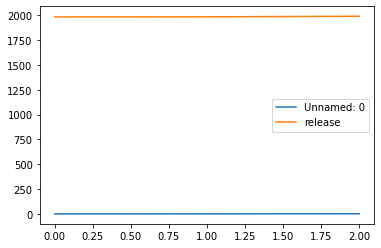

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

stock_data = pd.read_csv('./csv/OSlist.csv')
stock_data.plot()
plt.show()

## Protocol Buffers

print(family)Protocol BuffersはあらかじめMessage Typeというものを定義してデータを処理します。
Message Typeはメソッドを持たないクラスのようなものです。
今回は、proto2という言語を用いてMessage Typeを定義する方法を紹介します。

データ処理の流れは以下のとおりです。
1. proto2でMessage Typeを定義する
2. Message Typeが定義されたファイルをコンパイルする
3. Pythonでデータを記述していく

## hdf5形式

In [ ]:
hdf5はkerasで使われているデータ形式です。
例えば、学習したモデルを保存する場合はhdf5形式で出力されます。
hdf5の大きな特徴は、階層的な構造を1つのファイル内で完結できることです。

日本の人口について調べたいとします。
このとき、日本の人口は各都道府県の人口に分けることができます。
このような場合、一般的には"日本の人口"というディレクトリを作り、その中に各都道府県のディレクトリを作成します。
例えば"北海道の人口"ディレクトリの中には、北海道の市町村について、それぞれのディレクトリを作ります。

In [71]:
import h5py
import numpy as np
import os

np.random.seed(0)

# A県のうち、X市、Y市、Z市について考えます
# X市は1丁目〜3丁目、Y市は1丁目〜5丁目、Z市は1丁目のみあるとします

# それぞれの市の人口の定義
population_of_X = np.random.randint(50, high=200, size=3)
population_of_Y = np.random.randint(50, high=200, size=5)
population_of_Z = np.random.randint(50, high=200, size=1)

# 人口をリストにまとめる
population = [population_of_X, population_of_Y, population_of_Z]
print(population)
# 既にファイルが存在した場合削除する
if os.path.isfile('./csv/4080_data_handling_data/family_pd2.hdf5'):
    os.remove('./csv/4080_data_handling_data/family_pd2.hdf5')

# ファイルを開く
hdf_file = h5py.File('./csv/4080_data_handling_data/family_pd2.hdf5')

# 'A'という名前のグループを作成(A県の意味)
prefecture = hdf_file.create_group('A')

for i in range(3):
    # たとえばA/X/1は、A県X市1丁目のイメージ
    # Aディレクトリの中のXディレクトリの1という名前のファイルにデータを入れるイメージ
    for j in range(len(population[i])):
        city = hdf_file.create_dataset('A/' + ['X', 'Y', 'Z'][i] + '/' + str(j + 1), data=population[i][j])

# 書き込み
hdf_file.flush()

# 閉じる
hdf_file.close()

[array([ 97, 167, 117]), array([153,  59,  71,  86, 137]), array([120])]


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './csv/4080_data_handling_data/family_pd2.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## TFRRecord
![](./csv/4080_data_handling_data/tfrrecord.png)

In [90]:
import pandas as pd
import h5py
import numpy as np

# 開きたいファイルのパス
path = './csv/4080_data_handling_data/population.hdf5'

# ファイルを開く
# 'r'は読み取りモードの意味
population_data = h5py.File(path, 'r')
for prefecture in population_data.keys():
    for city in population_data[prefecture].keys():
        for i in population_data[prefecture][city].keys():
            # print(prefecture)
            # print(city)
            # print(prefecture)
            # print(population_data[prefecture][city][i].value)
            print(type(population_data[prefecture][city][i]))
            print(prefecture + '県' + city + '市' + i + '丁目: ', population_data[prefecture][city][i])

# 閉じる
population_data.close()

<class 'h5py._hl.dataset.Dataset'>
A県X市1丁目:  <HDF5 dataset "1": shape (), type "<i8">
<class 'h5py._hl.dataset.Dataset'>
A県X市2丁目:  <HDF5 dataset "2": shape (), type "<i8">
<class 'h5py._hl.dataset.Dataset'>
A県X市3丁目:  <HDF5 dataset "3": shape (), type "<i8">
<class 'h5py._hl.dataset.Dataset'>
A県Y市1丁目:  <HDF5 dataset "1": shape (), type "<i8">
<class 'h5py._hl.dataset.Dataset'>
A県Y市2丁目:  <HDF5 dataset "2": shape (), type "<i8">
<class 'h5py._hl.dataset.Dataset'>
A県Y市3丁目:  <HDF5 dataset "3": shape (), type "<i8">
<class 'h5py._hl.dataset.Dataset'>
A県Y市4丁目:  <HDF5 dataset "4": shape (), type "<i8">
<class 'h5py._hl.dataset.Dataset'>
A県Y市5丁目:  <HDF5 dataset "5": shape (), type "<i8">
<class 'h5py._hl.dataset.Dataset'>
A県Z市1丁目:  <HDF5 dataset "1": shape (), type "<i8">


In [87]:
import numpy as np
import tensorflow as tf
from PIL import Image

# 画像を読み込む
image = Image.open('./4080_data_handling_data/hdf5_explain.png')

# 書き出すデータの定義
# tf.train.Exampleというクラスを用いる
# tf.train.Featuresというクラスの"まとまり"
# 各tf.train.Featureの要素はbytes
# 今回はimage, label, height, widthをデータとして採用
my_Example = tf.train.Example(features=tf.train.Features(feature={
    'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image.tobytes()])),
    'label': tf.train.Feature(bytes_list=tf.train.BytesList(value=[np.ndarray([1000]).tobytes()])),
    'height': tf.train.Feature(bytes_list=tf.train.BytesList(value=[np.ndarray([image.height]).tobytes()])),
    'width': tf.train.Feature(bytes_list=tf.train.BytesList(value=[np.ndarray([image.width]).tobytes()])),
}))

# TFRecord形式のファイルを書き出すためのTRFecordWriteオブジェクトを生成
fp = tf.io.TFRecordWriter("./4080_data_handling_data/sample.tfrecord")
# Exampleオブジェクトをシリアライズして書き込み
fp.write(my_Example.SerializePartialToString())
# 閉じる
fp.close()

ModuleNotFoundError: No module named 'tensorflow'